# Correlation

Check the correlation between close prices of four main US indexes: S&P 500, NASDAQ, Dow Jones and Russell 2000.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read the already prepared data.

In [13]:
four_idx_1D = pd.read_csv('Data/four_main_indexes_1D.csv', index_col='Date')

In [14]:
four_idx_1D

,SP500,NASDAQ,DowJones,Russell
Date,,,,
2002-07-01,968.650024,15.000000,9109.790039,447.730011
2002-07-02,948.090027,15.130000,9007.750000,432.839996
2002-07-03,953.989990,15.000000,9054.969727,429.470001
2002-07-05,989.030029,15.000000,9379.500000,440.920013
2002-07-08,976.979980,14.000000,9274.900391,433.609985
...,...,...,...,...
2021-11-15,4697.959961,209.729996,36087.449219,2400.929932
2021-11-16,4682.939941,211.970001,36142.218750,2405.020020
2021-11-17,4690.700195,209.940002,35931.050781,2377.010010


Correlation calculation.

Using pandas (.corr). 

Method of correlation:
    pearson: standard correlation coefficient
    kendall: Kendall Tau correlation coefficient
    spearman: Spearman rank correlation
Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [16]:
method = 'pearson' # method='spearman' | method='kendall' | default: 'pearson'

In [17]:
corr_matrix = four_idx_1D.corr(method=method)

In [18]:
corr_matrix

,SP500,NASDAQ,DowJones,Russell
SP500,1.000000,0.975649,0.994410,0.980917
NASDAQ,0.975649,1.000000,0.960770,0.938576
DowJones,0.994410,0.960770,1.000000,0.982425
Russell,0.980917,0.938576,0.982425,1.000000


Using numpy (numpy.corrcoef).

In [36]:
four_idx_array = four_idx_1D.values.T

In [37]:
four_idx_array.shape

(4, 4884)

In [38]:
R1 = np.corrcoef(four_idx_array)

In [39]:
R1

array([[1.        , 0.97564929, 0.99441041, 0.98091652],
       [0.97564929, 1.        , 0.96077005, 0.93857594],
       [0.99441041, 0.96077005, 1.        , 0.98242451],
       [0.98091652, 0.93857594, 0.98242451, 1.        ]])

Correlation visualization.

The background_gradient can be used - only for pandas DataFrame.

In [52]:
corr_matrix.style.background_gradient(cmap="Greys", vmin=0.9, vmax=1)

,SP500,NASDAQ,DowJones,Russell
SP500,1.000000,0.975649,0.994410,0.980917
NASDAQ,0.975649,1.000000,0.960770,0.938576
DowJones,0.994410,0.960770,1.000000,0.982425
Russell,0.980917,0.938576,0.982425,1.000000


The seaborn heatmap. Works for DataFrame and numpy array.

In [73]:
def plot_corr_heatmap(data):
    plt.figure(figsize=(12,12))
    plt.title('Heatmap for main US idexes', fontsize='x-large')
    sns.heatmap(data=data, vmin=0.9, vmax=1, annot=True, cmap="copper")

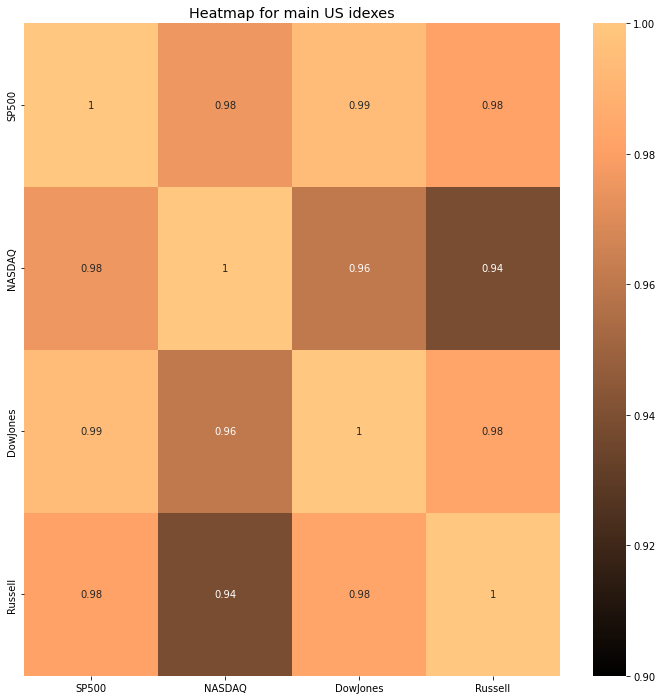

In [74]:
plot_corr_heatmap(corr_matrix)

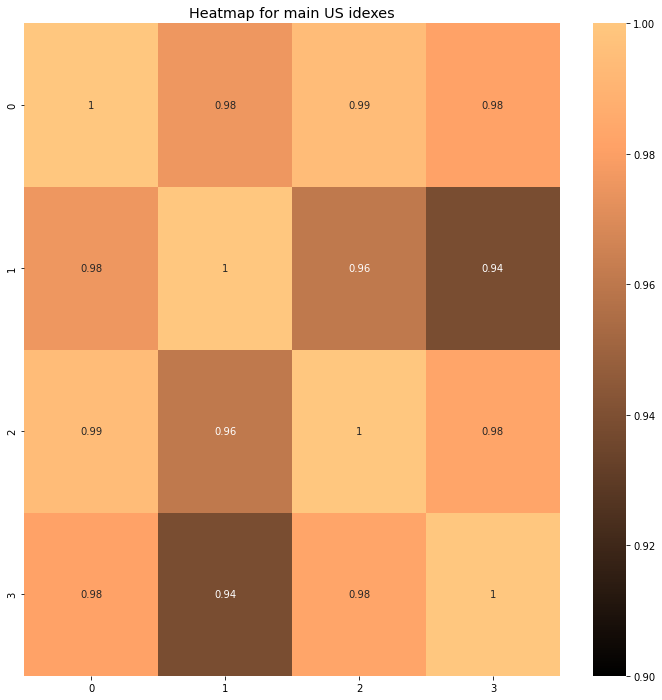

In [75]:
plot_corr_heatmap(R1)